# ***PRÁCTICO FINAL DE CIENCIA DE DATOS I - Coder House***
Estudiante: **Gonzalo Leonel Gramajo**  
Comisión: **74920**  
Documento: **40441349**  
Año: **2025**

____________________________________________________________________________________________
## **1. INTRODUCCIÓN Y OBJETIVO**

Este notebook corresponde al trabajo final del curso "Fundamentos de ciencia de datos" de Coder House. Está basado en un dataset de ventas de autos rescatado desde Keegle. Este conjunto de datos incluye todas las entradas de vehículos usados ​​dentro de los Estados Unidos en Craigslist.com.
Es importante resaltar que se cuenta con 426 mil lineas y el archivo ocupa 1.45 GB de almacenamiento, por lo que un archivo de tal tamaño no se peude subir a GitHub. Dado esto, el archivo .csv se puede encontrar disponible en Google Drive y obviamente, Kaggle.

### **Dataset**
Used Cars Dataset - Vehicles listings from Craigslist.org.  
Enlace web a Kaggle: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data  
Enlace web a Google Drive: https://drive.google.com/file/d/1uQ_YhqBimI46j5W-EgSwkjZvpFt87ejt/view?usp=sharing

### **Objetivo**
*Mediante el uso de algortimos de aprendizaje automático, lograr predecir el precio de venta de los vehículos según los datos de entrada odómetro (kilometraje), year (año de fabricación), transmission (trasmisión), fuel (combustible).*

**Pasos para lograr el objetivo:**
1.  **Introducción y Objetivo:** Definir el problema y el objetivo.
2.  **Importar Librerías:** Cargar las herramientas necesarias.
3.  **Carga de Datos:** Leer el dataset.
4.  **Hipótesis:** Plantear una hipótesis clara.
5.  **Análisis Exploratorio de Datos (EDA):** Entender los datos, distribuciones, valores faltantes y relaciones.
6.  **Feature Engineering (Ingeniería de Características):** Crear nuevas características si es relevante.
7.  **Preprocesamiento de Datos:** Preparar los datos para el modelo (manejo de categóricas, escalado).
8.  **División de Datos:** Separar en conjuntos de entrenamiento y prueba.
9.  **Construcción y Entrenamiento del Modelo:** Usar RandomForestClassifier.
10. **Evaluación del Modelo:** Medir el rendimiento con métricas adecuadas.
11. **Análisis de Importancia de Características:** Identificar qué variables son más influyentes.
12. **Conclusiones:** Interpretar los resultados y validar/refutar la hipótesis.

___________________________________________________________________________________________
## **2. IMPORTACIÓN DE MÓDULOS**

Para cargar todos los módulos (herramientas) que se necesitan en el despliegue de todo el análisis y entrenamiento, se debe ejecutar el siguiente código:

In [ ]:
# Herramientas principales
import pandas as pd
import numpy as np
# Módulos de visualización
import matplotlib.pyplot as plt
import seaborn as sns

___________________________________________________________________________________________
## **3. CARGA DE DATOS**

Para conseguir un dataframe de los datos que contiene el .csv del dataset rescatado, se debe ejecutar el siguiente código:

In [ ]:
file_path = './vehicles.csv' # ruta al archivo CSV
df = pd.read_csv(file_path) # leer el archivo CSV y conseguir un dataframe
df.head() # mostrar los primeros 5 valores

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


_____________________________________________________________________________
## **4. HIPÓTESIS**

Las siguientes hipótesis se plantean en marco al objetivo general de este análisis:  

1. **Los vehículos con valores en el odómetro más bajo se venden exponencialmente más caros.**  
*Esto es porque los vehículos con menos kilometraje (en teoría) deberían estar mas nuevos y en mejor estado que los autos que recorrieron más kilometros. En base a esto, se hipotetiza que la variación de este precio es de tipo exponencial.*  
  
2. **Los vehículos con año de fabricación menor, se venden exponencialmente más caros.**  
*Siguiendo con la premisa de que los autos más nuevos valen exponencialmente menos, se tratará de comprobar si esto también va en función del año de fabricación del vehículo y que correlación existe con la hipótesis anterior.*  

3. **Más del 50% de las publicaciones, son de vehículos con transmisión automática.**  
*Teniendo en cuenta la premisa que los automóviles con trasmisión automática son los más valuados, se verificará si esto es efectivamente así y que relación tiene con las 2 hipótesis anteriores.*

______________________________________________________________________________
## **5. ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)**

1. Verificar la integridad de los datos en las columnas. Esto se hace para verificar que tan buena es la calidad del dataset. Keggle, la pagina web desde donde se descargo el datase, muestra un reporte de la integridad de los datos de cada columna, pero para complementar el análisis, se realiza el siguiente codigo:

In [ ]:
# Función para calcular el porcentaje de integridad de cada columna
def column_integrity_simple(df):
    for col in df.columns:
        total_rows = len(df)
        non_null_count = df[col].notna().sum()
        integrity_percentage = (non_null_count / total_rows) * 100
        print(f"Columna {col}: {round(integrity_percentage, 2)}% -> {total_rows - non_null_count}/{total_rows}")

# Ejecutar el análisis de integridad simple
print("Integridad de los datos por columna:")
column_integrity_simple(df)

2. Debido a que se muestra que no todas las columnas están completas, con el 100% de los datos, es interesante saber que cantidad de datos falta. Para esto se ejecuta la siguiente línea de código.

In [ ]:
df.isna().sum()

3. asd

In [ ]:
df.info()

4. asd

In [ ]:
df.describe()

### Descripción de los campos

| # | CAMPO | TIPO DE DATO | DESCRIPCIÓN |
|---|-------|--------------|-------------|
| 1 | id | number | identificador del automovil publicado en la pagina web. |
| 2 | url | string | direccion web a la publicaciion del automovil en la pagina web. |
| 3 | region | string | estado de los estado unidos donde esta publicado el automovil segun Craiglist. |
| 4 | region_url | string | url pertencceinte exclusivamente a la region. |
| 5 | price | number | precio del automovil en unidades de la moneda dolar (USD). |
| 6 | year | number | año de fabricacion del automovil. |
| 7 | manufacturer | string |fabricante del vehiculo. |
| 8 | model | string | modelo del vehiculo segun la disignacion que le dio el fabricante. |
| 9 | condicion | string | esta es una evaluacion que se hace al publicar el automovil en la pagina web, pero es un dato subjetivo acorde al publicador. |
| 10 | cylinders | string | cantidad de cilindros que tiene el motor en su estructura y como estan configurados. |
| 11 | fuel | string | combustible que utiliza el vehiculo. |
| 12 | odometer | number | es la distancia recorrida todal del vehiculo en millas. |
| 13 | title_status | string | estado del titulo del vehiculo. No se conoce especificamente que significa, se averiguara mas al respecto. |
| 14 | transmission | string | tipo de trasmision con la que esta configurado el vehiculo. |
| 15 | VIN | string | numero de identificacion del vehiculo. Es parecido a la patente. |
| 16 | drive | string | tipo de traccion del vehiculo. Esto es, como se distribuye la energia mecanica a las ruedas. |
| 17 | size | number | se invertigara mas al respecto de que significa esta columna. |
| 18 | type | string | tipo o categoria del formato del vehiculo. |
| 19 | paint_color | string | color exterior del vehiculo. |
| 20 | image_url | string | link a la imagen del vehiculo publicado. |
| 21 | description | string | descripcion del vehiculo redactada por la persona que publico el vehiculo en la pagina web. |
| 22 | country | null | columna vacia ya que el valor siempre era estados unidos. |
| 23 | state | string | estado de los estados unidos donde se publica el vehiculo. No se almacena el nombre ompleto, sino la abreviatura. |
| 24 | lat | number | latitud de la ubicacion del vehiculo listado. |
| 25 | lon | number | longitud de la ubicacion del vehiculo listado. |
| 26 | posting_date | datetime | fecha de la publicacion del vehiculo. |

Debido a que existen datos que no se encuentran en el dataframe, se procede a completar los mismos con datos acordes al tipo que corresponde. Esto se hace con el fin de

In [ ]:
# Completamos los datos faltantes en las columnas de tipo object/string
columnas_editar = ("manufacturer","model","condition",
                   "cylinders","fuel","title_status",
                   "transmission","drive", "size", "type",
                   "paint_color")
for columna in columnas_editar:
    df[columna] = df[columna].fillna("uknown")

# Completamos los datos faltantes en las columnas de tipo number
df["year"] = df["year"].fillna(df["year"].mean())
df["odometer"] = df["odometer"].fillna(df["odometer"].mean())

# Mostrar que los datos fueron modificados en el dataframe
df.isna().sum()

Hay columnas que no fueron completadas porque no es necesario hacerlo por el tipo de dato que representan. Por ejemplo, VIN es la patente o un identificador unico del vehoiculo. Sin embargo, no son datos que sean relevantes para la contrastación de la hipotesis y no serán usados en el análisis o entrenamiento. Como así tambien la ubicacion precisa de donde se realizo el posteo, es decir "lat" y "lon".

### Contrastación de las hipótesis

#### Hipótesis 1:
*''Los vehículos con valores en el odómetro más bajo se venden exponencialmente más caros.''*

Primero, se consigue las medidas de tendencia central y otras medidas complementarias. La MODA no se calcula, ya que los precios son variados y dificilmente se repitan.

In [ ]:
# Calcular estadísticas para la columna "odometer"
odometer_stats = {
    "Media": df["odometer"].mean(),
    "Mediana": df["odometer"].median(),
    "Rango": df["odometer"].max() - df["odometer"].min(),
    "Varianza": df["odometer"].var(),
    "Desvío estándar": df["odometer"].std(),
    "Percentil 25": df["odometer"].quantile(0.25),
    "Percentil 50 (Mediana)": df["odometer"].quantile(0.50),
    "Percentil 75": df["odometer"].quantile(0.75),
    "Valor mínimo": df["odometer"].min(),
    "Valor máximo": df["odometer"].max()
}

# Imprimir los resultados
for key, value in odometer_stats.items():
    print(f"{key}: {round(value, 2)}")

Media: 98043.33
Mediana: 85548.0
Rango: 10000000.0
Varianza: 45745296383.6
Desvío estándar: 213881.5
Percentil 25: 37704.0
Percentil 50 (Mediana): 85548.0
Percentil 75: 133542.5
Valor mínimo: 0.0
Valor máximo: 10000000.0


ValueError: levels must be in [0, 1]

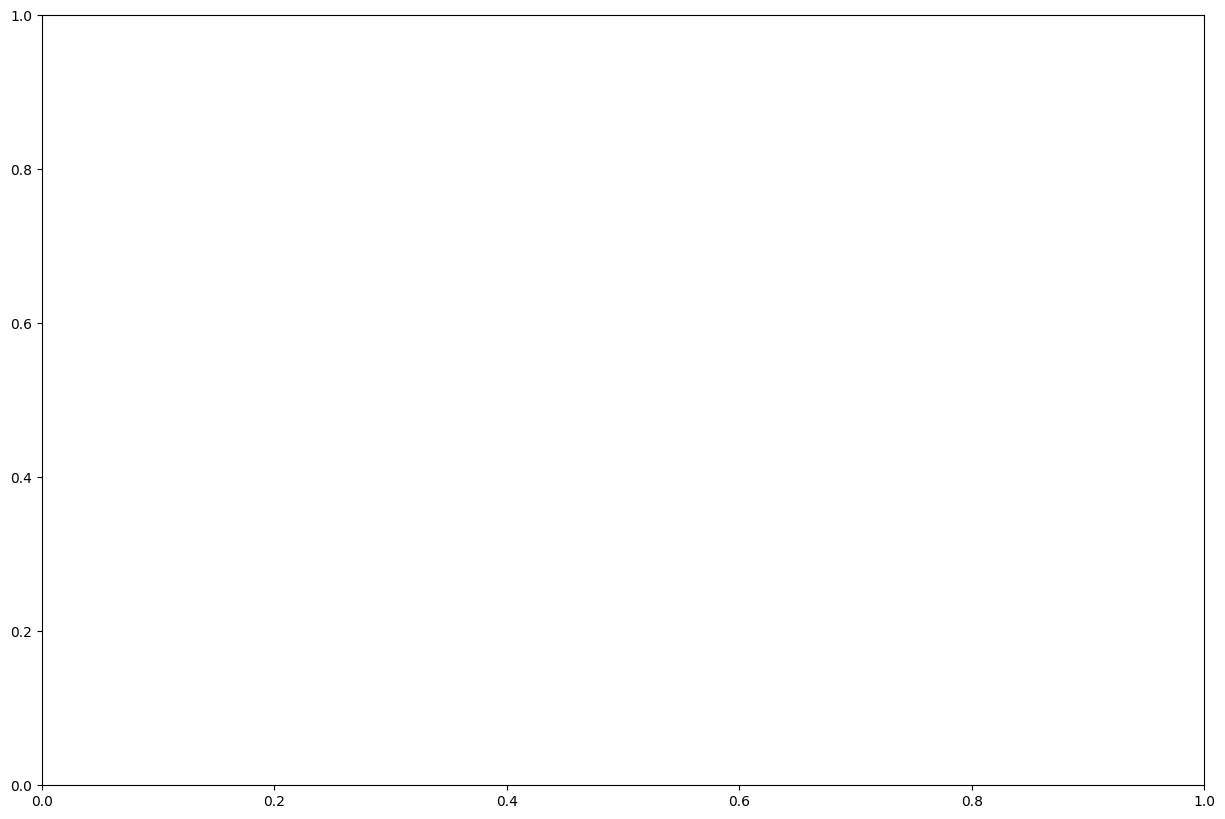

In [ ]:
# Asegurar que las columnas sean numéricas y eliminar valores NaN
df["odometer"] = pd.to_numeric(df["odometer"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')

# Filtrar valores no nulos
df_clean = df.dropna(subset=["odometer", "price"])

# Crear el gráfico
plt.figure(figsize=(15, 10))
#sns.histplot(df_clean, x="odometer", y="price", bins=50, pthresh=0.1, cmap="Blues")

# using numpy.linspace to ensure they are strictly increasing:
levels = np.linspace(df_clean["price"].min(), df_clean["price"].max(), 10)  # 10 levels between min and max price
# Plot using the calculated levels:
sns.kdeplot(x=df_clean["odometer"], y=df_clean["price"], color="red", linewidth=2, levels=levels)

# Etiquetas y título
plt.title("Relación entre Odómetro y Precio de Venta")
plt.xlabel("Odómetro (millas)")
plt.ylabel("Precio (USD)")

# Mostrar el gráfico
plt.show()

In [ ]:
correlacion = df["odometer"].corr(df["price"])
print(f"La correlación entre odómetro y precio es: {round(correlacion, 2)}")

La correlación entre odómetro y precio es: 0.01


______________________________________________________________________________
## **6. FEATURE ENGINEERING (Ingeniería de características)**

______________________________________________________________________________
## **7. PREPROCESAMIENTO DE DATOS**

______________________________________________________________________________
## **8. DIVISIÓN DE DATOS**

______________________________________________________________________________
## **9. CONSTRUCCIÓN Y ENTRENAMIENTO DEL MODELO**

______________________________________________________________________________
## **10. EVALUACIÓN DEL MODELO**

______________________________________________________________________________
## **11. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS**

______________________________________________________________________________
## **12. CONCLUSIONES**